# <span style="color:#0F19C9">Contents</span>

- [Importing and reading data](#importing-and-reading-data)
- [Data understanding](#data-understanding)
- [Univariable analysis](#univariable-analysis)
- [Multivariable analysis](#multivariable-analysis)
- [Hypothesis testing](#hypothesis)

# <span style="color:#0F19C9">Importing and reading data</span>

In [440]:
import pandas as pd
import matplotlib.pyplot as plt

In [395]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [396]:
# Import the processed file
df = pd.read_csv('../Data/Processed/processed_data.csv')

# <span style="color:#0F19C9">Data understanding</span>

In [397]:
# Display the shape of the dataframe
df.shape

(61210, 7)

In [398]:
# Show the first 5 rows
df.head(5)

,User_ID,Track,Artist,Genre,City,Hour_of_Play,Day_of_the_Week
0,FFB692EC,Kamigata To Boots,The Mass Missile,Rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,Rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,Pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,Folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,Dance,Springfield,08:34:34,Monday


In [399]:
# Change the type of data of 'Hour_of_Play'
df['Hour_of_Play'] = pd.to_datetime(
    df['Hour_of_Play'], format='%H:%M:%S').dt.time

We have 61,210 rows with the music consumption of two United States cities. We have cleaned the set, and this is the final, clean dataset to work with.

# <span style="color:#0F19C9">Univariable analysis</span>

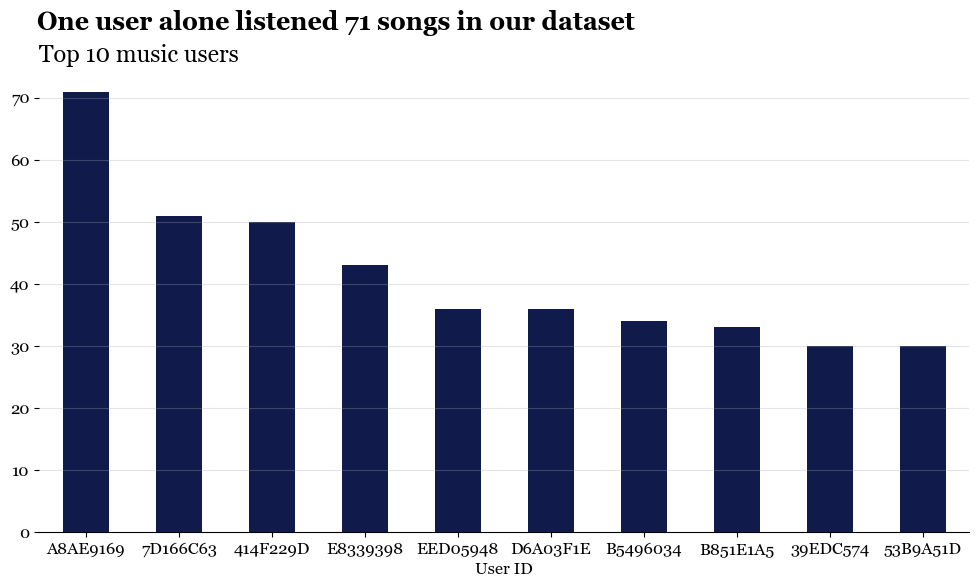

User_ID
A8AE9169    71
7D166C63    51
414F229D    50
E8339398    43
EED05948    36
D6A03F1E    36
B5496034    34
B851E1A5    33
39EDC574    30
53B9A51D    30
Name: count, dtype: int64

In [400]:
# Top Users
fig, ax = plt.subplots(figsize=[12, 6])
df['User_ID'].value_counts().head(10).plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('One user alone listened 71 songs in our dataset',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 music users', loc='left', size=17)
plt.xlabel('User ID')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.xticks(rotation=0)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Show the count
df['User_ID'].value_counts().head(10)

In [401]:
# Count the unique tracks
df['Track'].nunique() / df.shape[0] * 100

64.77209606273485

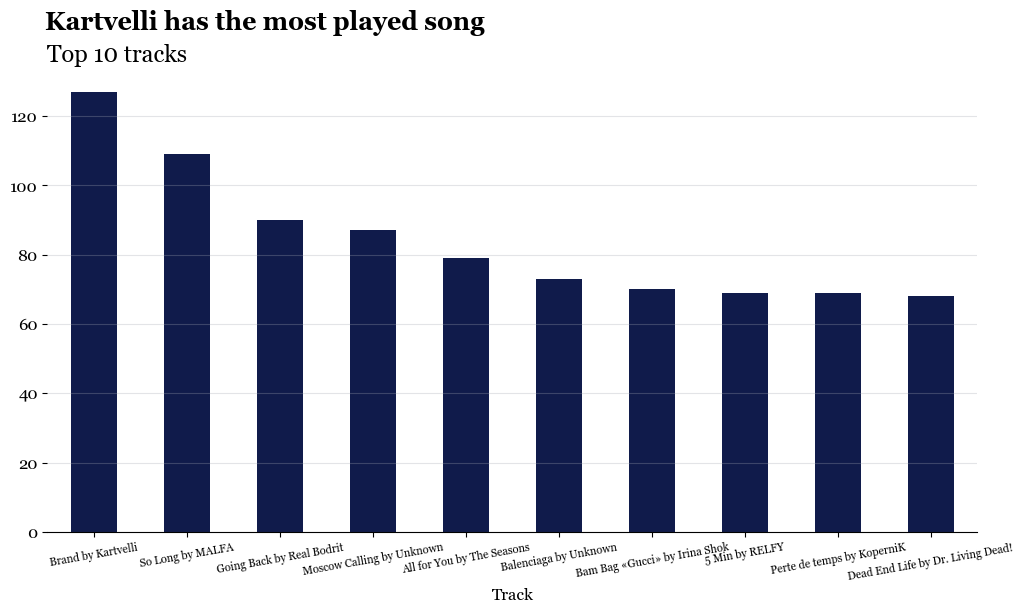

Track_n_Artist
Unknown by Unknown                   1260
Brand by Kartvelli                    127
So Long by MALFA                      109
Going Back by Real Bodrit              90
Moscow Calling by Unknown              87
All for You by The Seasons             79
Balenciaga by Unknown                  73
Bam Bag «Gucci» by Irina Shok          70
5 Min by RELFY                         69
Perte de temps by KoperniK             69
Dead End Life by Dr. Living Dead!      68
Name: count, dtype: int64

In [402]:
# Most listened tracks
df['Track_n_Artist'] = df['Track'] + ' by ' + df['Artist']
fig, ax = plt.subplots(figsize=[12, 6])
df['Track_n_Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli has the most played song',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 tracks', loc='left', size=17)
plt.xlabel('Track')
plt.grid(True, color=juan_colors[2], axis='y',
         alpha=0.3)
plt.xticks(rotation=10, size=8)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Show the count in a table
df['Track_n_Artist'].value_counts().iloc[0:11]

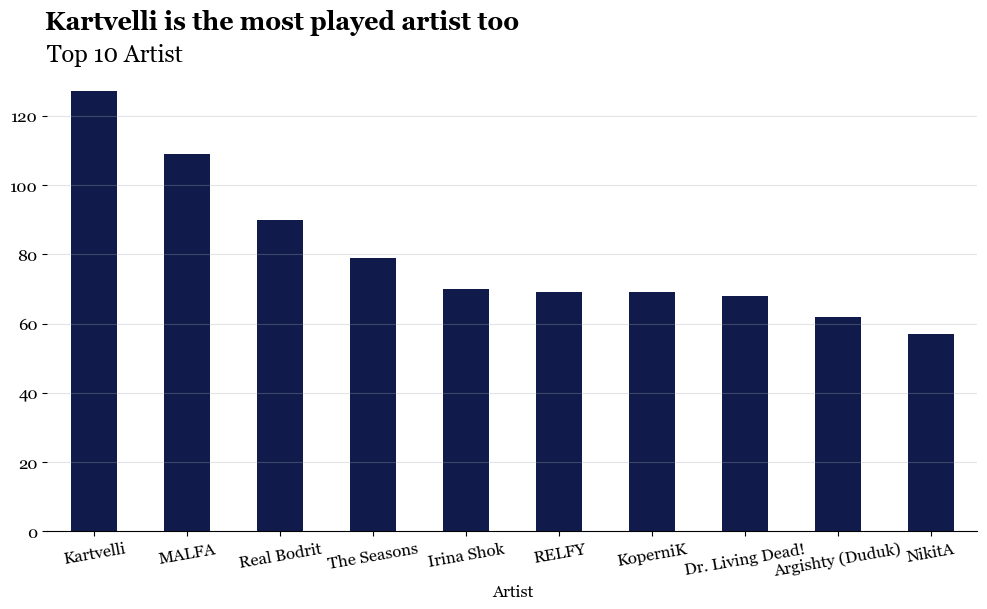

Artist
Unknown             7093
Kartvelli            127
MALFA                109
Real Bodrit           90
The Seasons           79
Irina Shok            70
RELFY                 69
KoperniK              69
Dr. Living Dead!      68
Argishty (Duduk)      62
NikitA                57
Name: count, dtype: int64

In [403]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli is the most played artist too',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 Artist', loc='left', size=17)
plt.xticks(rotation=10)
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Artist'].value_counts().head(11)

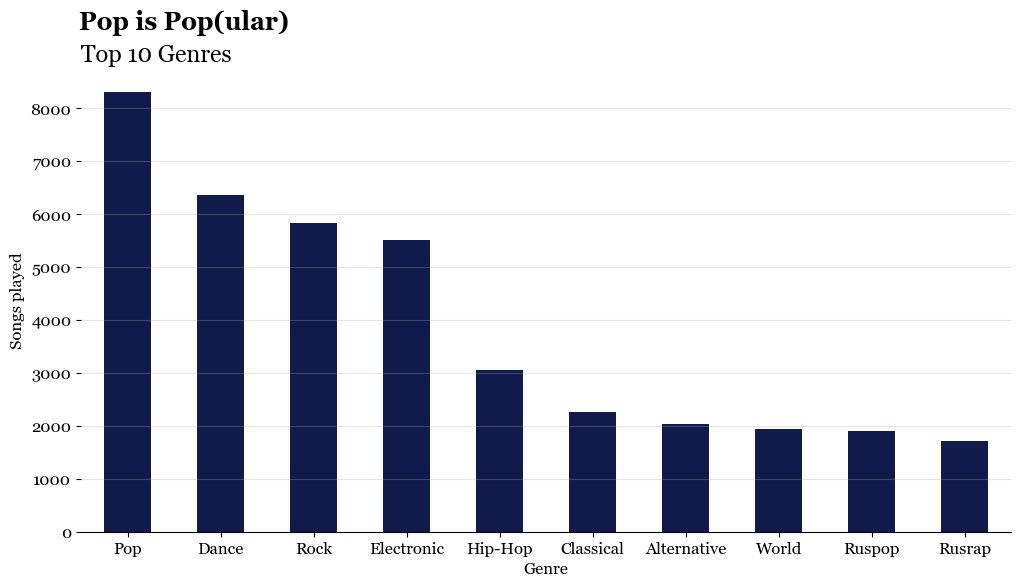

Genre
Pop            8316
Dance          6362
Rock           5839
Electronic     5520
Hip-Hop        3055
Classical      2260
Alternative    2028
World          1945
Ruspop         1909
Rusrap         1724
Name: count, dtype: int64

In [404]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Genre'].value_counts().head(10) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Pop is Pop(ular)', weight='bold',
             ha='left', x=0.123, size=18)
plt.title('Top 10 Genres', loc='left',
          size=17)
plt.xticks(rotation=0)
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Genre'].value_counts().head(10)

In [405]:
# Find the percentage of popular genres
df['Genre'].value_counts().iloc[0:4].sum() / df.shape[0] * 100

42.53716712955399

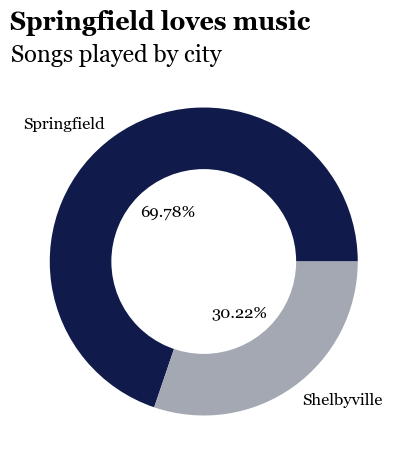

In [406]:
# Create city plot
fix, ax = plt.subplots(figsize=[5, 5])
df['City'].value_counts() \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax)
plt.suptitle('Springfield loves music', ha='left',
             x=0.125, y=1, size=18, weight='bold')
plt.title('Songs played by city', loc='left',
          size=17)
plt.ylabel('')
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

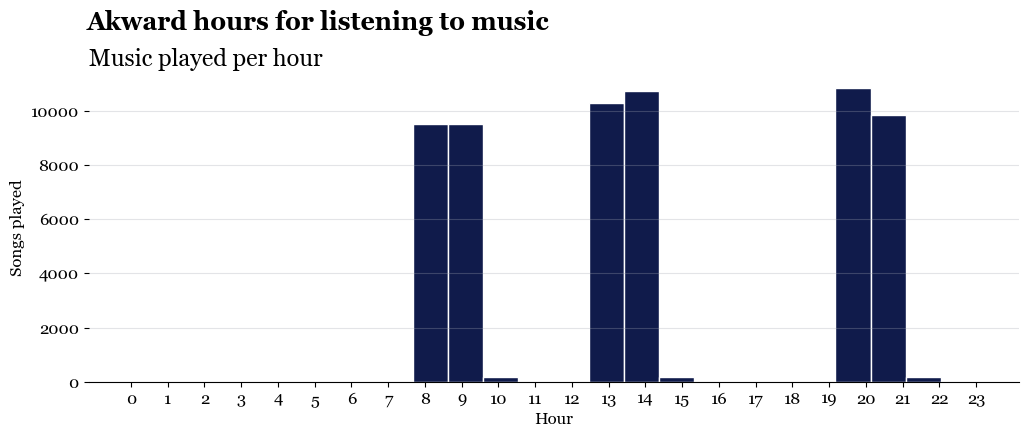

Hour
8      9510
9      9504
10      169
13    10299
14    10715
15      176
20    10821
21     9844
22      172
Name: count, dtype: int64

In [407]:
# Create de hour column
df['Hour'] = pd.to_datetime(df['Hour_of_Play'], format='%H:%M:%S').dt.hour

fig, ax = plt.subplots(figsize=[12, 4])
plt.hist(df['Hour'], bins=24, range=(0, 23), edgecolor='white',
         color=juan_colors[0])
plt.suptitle('Akward hours for listening to music', ha='left',
             x=0.123, y=1.04, size=18, weight='bold')
plt.title('Music played per hour', loc='left',
          size=17)
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Hour'].value_counts().sort_index()

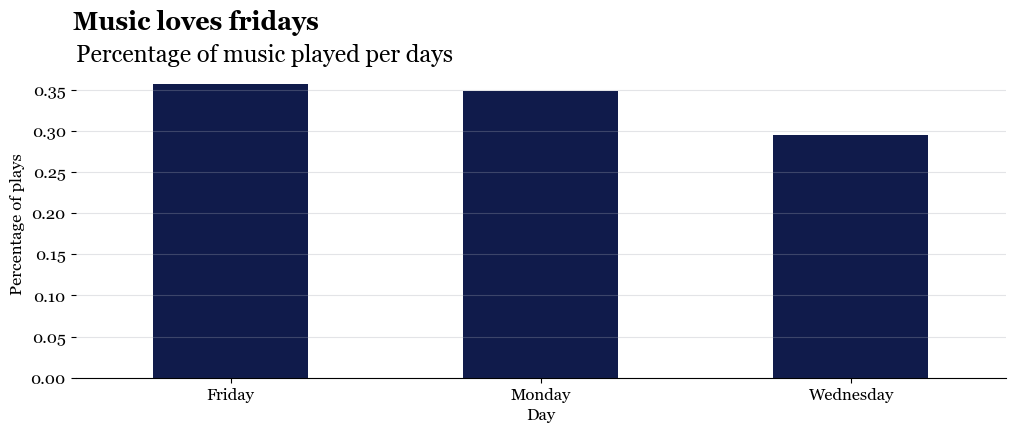

Day_of_the_Week
Friday       21827
Monday       21338
Wednesday    18045
Name: count, dtype: int64

In [408]:
fig, ax = plt.subplots(figsize=[12, 4])
df['Day_of_the_Week'].value_counts(normalize=True) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Music loves fridays', ha='left',
             x=0.123, y=1.03, size=18, weight='bold')
plt.title('Percentage of music played per days',
          size=17, loc='left')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Percentage of plays')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Day_of_the_Week'].value_counts()

We found that we do not have unique user rows; our top user has between 71 and 30 rows of music played.

64.77% of the rows have unique tracks, and the tracks with unknown names and artists have the highest number of plays with 1,260. We are not going to drop them because they are not that significant for this analysis. Later, we found in our list the song "Brand" by Kartvelli with 127 records, "So Long" by MALFA with 109 records, and "Going Back" by Real Bodrit with 90 records.

Similarly, Kartvelli has the highest number of played songs with 127 records after the unknown records, which are 7,093. In the third position, we found MALFA with 109 records and Real Bodrit with 90 records.

Regarding genres, Pop with 8,316 songs played, Dance music with 6,362 songs played, Rock music with 5,839 songs played, and Electronic music with 5,520 songs played represent 42.53% of all played music and are the favorite music genres of those two cities. They are followed by Hip-Hop, Classical, Alternative, and World music.

During the same week, Springfield had 69.78% of the records played against 30.22% in Shelbyville, which shows a clear difference in the amount of music played and consumption patterns.

When talking about the hour of playing, we have a significant problem with our dataframe because there is a giant bias. It is not logical that people listen to music only three hours in a single day, and that there are zero played songs at other hours. Another bias in our dataset is about the day of the week, as we only have records for Monday, Wednesday, and Friday. Friday and Monday are the days with the most music played, with more than 21,000 records, while Wednesday is the worst day with 18,045 records.

# <span style="color:#0F19C9">Multivariable analysis</span>

In [409]:
# Find the favorite tracks by user
df[df['Track'] != 'Unknown'].groupby(['User_ID', 'Track'])[
    'Track'].count().sort_values(ascending=False).head(5)

User_ID   Track            
D5F7E06D  Tourdion             10
B3AEE0E   I Can Change         10
E2EA9731  El Mudo               9
A4B31EA7  Aquaman               8
3E4BFAA7  How High the Moon     8
Name: Track, dtype: int64

In [410]:
# Find the favorite artist by user
df[df['Artist'] != 'Unknown'].groupby(['User_ID', 'Artist'])[
    'Artist'].count().sort_values(ascending=False).head(2)

User_ID   Artist     
F3361E35  Faiha          3
3ABD7F5F  Novi Fosili    3
Name: Artist, dtype: int64

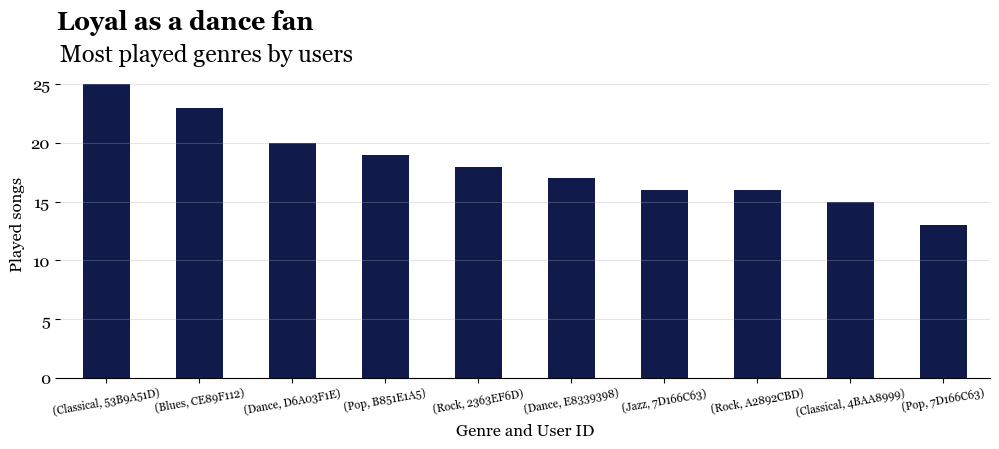

Genre      User_ID 
Classical  53B9A51D    25
Blues      CE89F112    23
Dance      D6A03F1E    20
Pop        B851E1A5    19
Rock       2363EF6D    18
Dance      E8339398    17
Jazz       7D166C63    16
Rock       A2892CBD    16
Classical  4BAA8999    15
Pop        7D166C63    13
Name: Track, dtype: int64

In [411]:
# Find favorite genres by user
favorite_genres = df[df['Genre'] != 'Unknown'].groupby(
    ['Genre', 'User_ID'])['Track'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[12, 4])
favorite_genres.head(10) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Loyal as a dance fan', ha='left',
             size=18, weight='bold', x=0.123, y=1.03)
plt.title('Most played genres by users', loc='left',
          size=17)
plt.xlabel('Genre and User ID')
plt.xticks(rotation=10, size=8)
plt.ylabel('Played songs')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
favorite_genres.head(10)

In [412]:
# Create a table of the city and genre relation
genre_per_city = df.pivot_table(
    index='Genre', columns='City', values='Track', aggfunc='count', fill_value=0)

# Favorites genres by cities
shelbyville_genres = genre_per_city.sort_values(
    by='Shelbyville', ascending=False).head(5)
springfield_genres = genre_per_city.sort_values(
    by='Springfield', ascending=False).head(5)

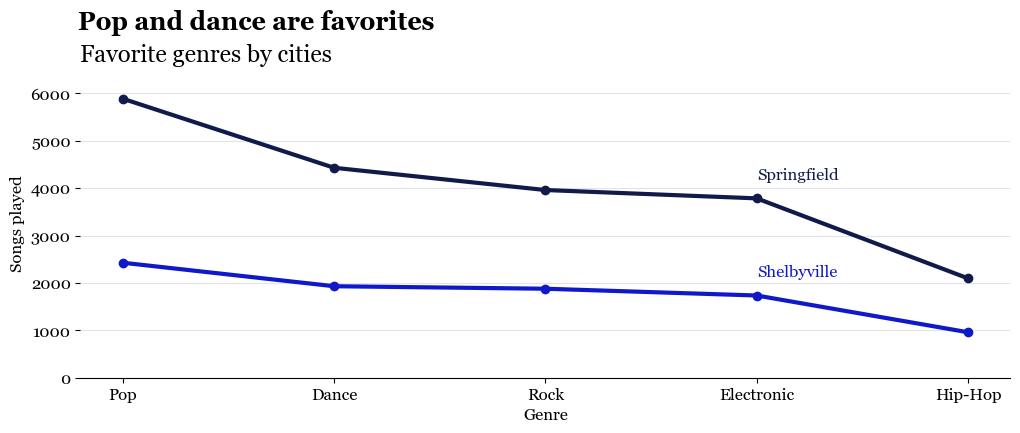

In [413]:

fig, ax = plt.subplots(figsize=[12, 4])
plt.plot(shelbyville_genres.index,
         shelbyville_genres['Shelbyville'],
         color=juan_colors[4],
         linewidth=3,
         marker='o')
ax.annotate('Shelbyville',
            xy=(shelbyville_genres.index[-2],
                shelbyville_genres['Shelbyville'].values[-2] + 400),
            color=juan_colors[4])
plt.plot(springfield_genres.index,
         springfield_genres['Springfield'],
         color=juan_colors[0],
         linewidth=3,
         marker='o')
ax.annotate('Springfield',
            xy=(springfield_genres.index[-2],
                springfield_genres['Springfield'].values[-2] + 400),
            color=juan_colors[0])
plt.suptitle('Pop and dance are favorites',
             ha='left', x=0.123, y=1.03,
             size=18, weight='bold')
plt.title('Favorite genres by cities',
          loc='left', size=17)
plt.ylim(0, 6500)
plt.xlabel('Genre')
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We found that "Tourdion" is the favorite track of the user `D5F7E06D`; they played it 10 times. Similarly, "I Can Change" is the favorite track of the user `B3AEE0E`, also played 10 times. "El mudo" is the favorite track of the user `E2EA9731`, played 9 times. "Aquaman" and "How High the Moon" are the favorite songs of `A4B31EA7` and `3E4BFAA7`, respectively, each played 8 times. There isn't one favorite track for various users.

We found that only a few users listen to the same artist 3 times, which, compared to the number of tracks played, is not significant.

Although we have one user who listened to classical songs 25 times, we found two users who listened to dance music, followed by two users who listened to many rock songs, making these the genres most listened to. Overall, the main consumption of music is Pop in both cities, followed by dance music, rock, electronic, and Hip-Hop music, in that order.

In [414]:
# Create a pivot table of hour and genre
genre_per_hour = df.pivot_table(index='Hour', columns='Genre',
                                values='Track', aggfunc='count',
                                fill_value=0).reindex(range(24), fill_value=0)

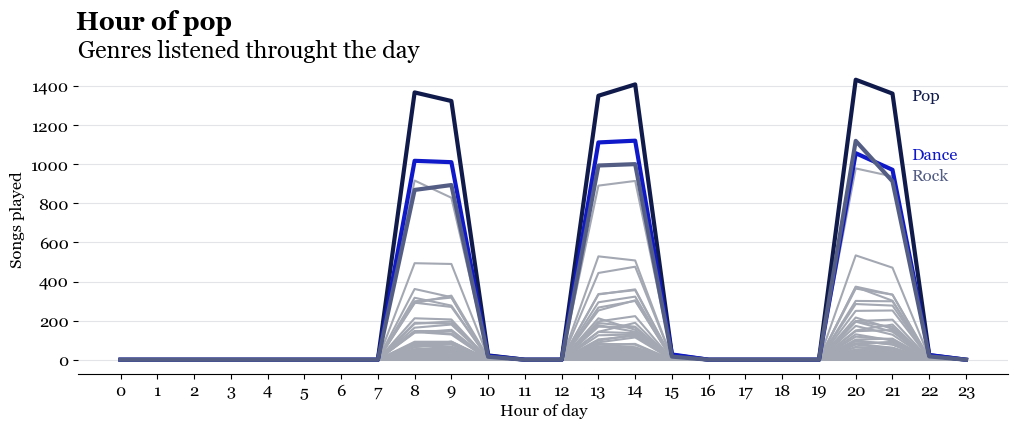

In [415]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Hour of pop', x=0.123,
             size=18, weight='bold',
             ha='left', y=1.02)
plt.title('Genres listened throught the day',
          size=17, loc='left')
for genre in genre_per_hour.columns:
    plt.plot(genre_per_hour.index,
             genre_per_hour[genre],
             color=juan_colors[2])
plt.plot(genre_per_hour.index,
         genre_per_hour['Pop'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Pop', color=juan_colors[0],
            xy=(21.5, genre_per_hour['Pop'].values[-2] + 1300))
plt.plot(genre_per_hour.index,
         genre_per_hour['Dance'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Dance', color=juan_colors[4],
            xy=(21.5, genre_per_hour['Dance'].values[-2] + 1000))
plt.plot(genre_per_hour.index,
         genre_per_hour['Rock'],
         color=juan_colors[1],
         linewidth=3)
ax.annotate('Rock', color=juan_colors[1],
            xy=(21.5, genre_per_hour['Rock'].values[-2] + 900))
plt.xticks(range(24))
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.xlabel('Hour of day')
plt.ylabel('Songs played')
plt.show()

In [416]:
hour_per_city = df.pivot_table(index='Hour', columns='City',
                               values='Track', aggfunc='count').reindex(range(24), fill_value=0)
hour_per_city['Shelbyville'] = round(
    hour_per_city['Shelbyville'] / hour_per_city['Shelbyville'].sum(), 2)
hour_per_city['Springfield'] = round(
    hour_per_city['Springfield'] / hour_per_city['Springfield'].sum(), 2)

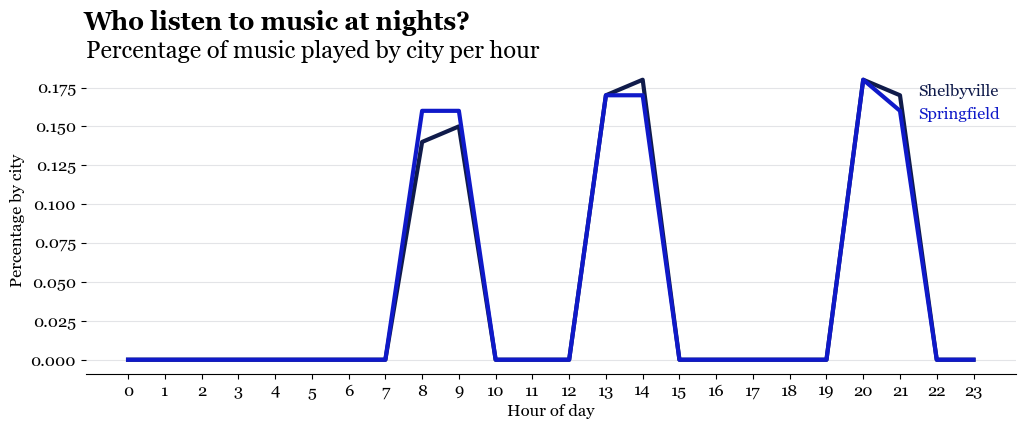

In [417]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Who listen to music at nights?',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Percentage of music played by city per hour',
          loc='left', size=17)
plt.plot(hour_per_city.index,
         hour_per_city['Shelbyville'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Shelbyville',
            xy=(21.5, 0.17),
            color=juan_colors[0])
plt.plot(hour_per_city.index,
         hour_per_city['Springfield'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Springfield',
            xy=(21.5, 0.155),
            color=juan_colors[4])
plt.xticks(range(24))
plt.xlabel('Hour of day')
plt.ylabel('Percentage by city')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [418]:
# Create a table of day of the week per city
day_per_city = df.pivot_table(index='Day_of_the_Week', columns='City',
                              values='Track', aggfunc='count')
day_per_city['Shelbyville'] = round(
    day_per_city['Shelbyville'] / day_per_city['Shelbyville'].sum(), 2)
day_per_city['Springfield'] = round(
    day_per_city['Springfield'] / day_per_city['Springfield'].sum(), 2)
day_per_city

City,Shelbyville,Springfield
Day_of_the_Week,,
Friday,0.32,0.37
Monday,0.30,0.37
Wednesday,0.38,0.26


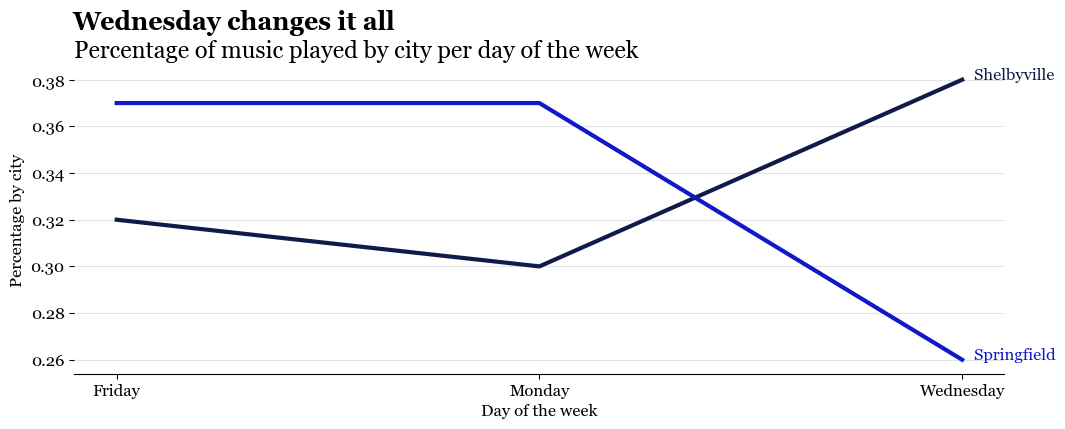

In [419]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Wednesday changes it all',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Percentage of music played by city per day of the week',
          loc='left', size=17)
plt.plot(day_per_city.index,
         day_per_city['Shelbyville'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('   Shelbyville',
            xy=(day_per_city.index[-1],
                day_per_city['Shelbyville'].values[-1]),
            color=juan_colors[0])
plt.plot(day_per_city.index,
         day_per_city['Springfield'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('   Springfield',
            xy=(day_per_city.index[-1],
                day_per_city['Springfield'].values[-1]),
            color=juan_colors[4])
plt.xlabel('Day of the week')
plt.ylabel('Percentage by city')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We can confidently say that Pop music is a genre that people listen to throughout the day, while listeners of dance music enjoy it more from 12 PM to 3 PM. Rock music, on the other hand, is enjoyed more at night, significantly more than in the morning.

After examining the differences in the number of records for each city, we can interpret the consumption relative to the population percentage. Thus, we can conclude that people listen to more music at night and less in the mornings. Additionally, Mondays and Fridays show relatively similar consumption patterns, but Wednesdays exhibit a significant difference: in Shelbyville, people listen to music 8% more compared to other days, whereas in Springfield, people listen to music 9% less.

In [420]:
# Create a table of hour of day per day of the week
hour_per_day = df.pivot_table(index='Hour',
                              columns='Day_of_the_Week',
                              values='Track',
                              aggfunc='count').reindex(range(24), fill_value=0)

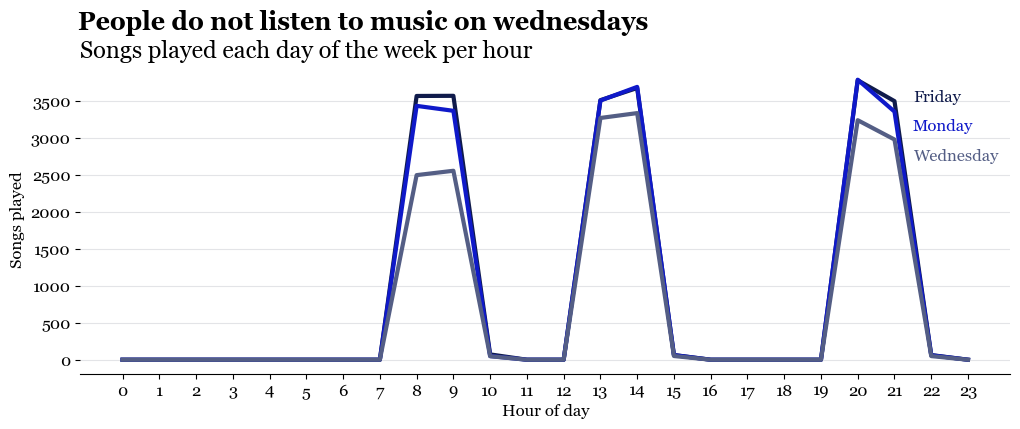

In [421]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('People do not listen to music on wednesdays',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Songs played each day of the week per hour',
          loc='left', size=17)
plt.plot(hour_per_day.index,
         hour_per_day['Friday'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Friday',
            xy=(21.5, 3500),
            color=juan_colors[0])
plt.plot(hour_per_day.index,
         hour_per_day['Monday'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Monday',
            xy=(21.5, 3100),
            color=juan_colors[4])
plt.plot(hour_per_day.index,
         hour_per_day['Wednesday'],
         color=juan_colors[1],
         linewidth=3)
ax.annotate('Wednesday',
            xy=(21.5, 2700),
            color=juan_colors[1])
plt.xticks(range(24))
plt.xlabel('Hour of day')
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

Friday is the day of the week with the highest music consumption in those two cities. Next, we can plan campaigns around Monday because there is good consumption around noon. However, Wednesday is consistently the worst day for music consumption at every hour.

# <span style="color:#0F19C9">Hypothesis testing</span>

Finally, we will answer the main question of the project: **Who are the best users of the platform and what hour they consume music regularly?**

In [422]:
# Find the top 10 users of the platform
top_10_users = df.groupby('User_ID')['Track'] \
    .count() \
    .sort_values(ascending=False) \
    .head(10).index
top_10_users

Index(['A8AE9169', '7D166C63', '414F229D', 'E8339398', 'EED05948', 'D6A03F1E',
       'B5496034', 'B851E1A5', '53B9A51D', '39EDC574'],
      dtype='object', name='User_ID')

In [423]:
# Count the number of tracks played by user per genre
users_favorite_genres = df.pivot_table(index='User_ID',
                                       columns='Genre',
                                       values='Track',
                                       aggfunc='count',
                                       fill_value=0)
users_favorite_genres.drop(columns='Unknown', inplace=True)
top_users_genres = users_favorite_genres.loc[top_10_users] \
    .transpose()

# Extract favorite genres of top users
users_info = {}
for user in top_users_genres.columns:
    top_5_genres = top_users_genres \
        .sort_values(by=user, ascending=False) \
        .head(5).index \
        .to_list()
    users_info[user] = top_5_genres

users_info

{'A8AE9169': ['Acid', 'Popeurodance', 'New', 'Newage', 'Newwave'],
 '7D166C63': ['Jazz', 'Pop', 'Schlager', 'Rock', 'Dance'],
 '414F229D': ['Alternative', 'Videogame', 'Acid', 'Oceania', 'Pop'],
 'E8339398': ['Dance', 'Electronic', 'Progressive', 'Pop', 'Hip-Hop'],
 'EED05948': ['Acid', 'Popeurodance', 'New', 'Newage', 'Newwave'],
 'D6A03F1E': ['Dance', 'Electronic', 'Pop', 'World', 'Techno'],
 'B5496034': ['Blues', 'Rock', 'Rnb', 'Urban', 'Pop'],
 'B851E1A5': ['Pop', 'Urban', 'Funk', 'Electronic', 'Rock'],
 '53B9A51D': ['Classical', 'Pop', 'Holiday', 'Easy', 'Vocal'],
 '39EDC574': ['Acid', 'Popeurodance', 'New', 'Newage', 'Newwave']}

In [424]:
# Extract all genres of top users
all_genres = [genre for genres in users_info.values() for genre in genres]

# Create new dataframe
df_top_genres = pd.DataFrame(all_genres, columns=['Genre'])
df_top_genres = df_top_genres.value_counts().head(10).reset_index()

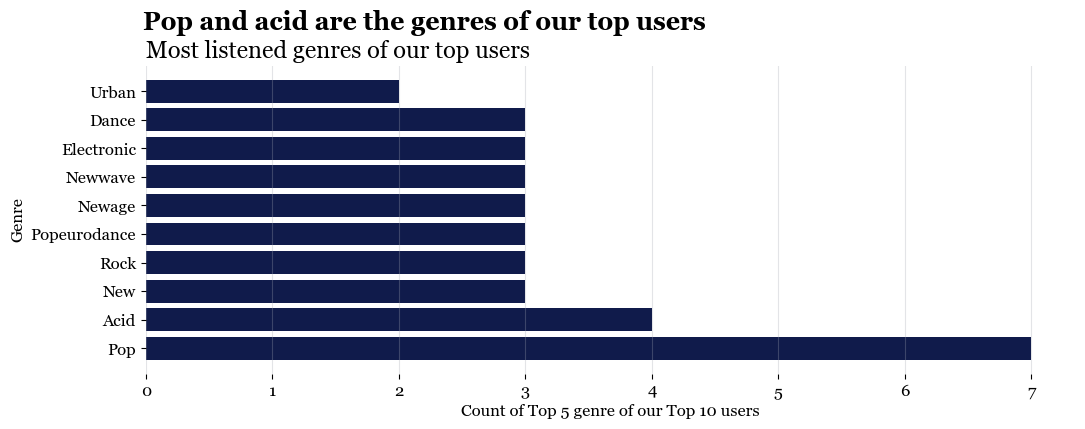

In [425]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Pop and acid are the genres of our top users',
             ha='left', x=0.123, size=18,
             weight='bold', y=1.02)
plt.title('Most listened genres of our top users',
          size=17, loc='left')
plt.barh(df_top_genres['Genre'],
         width=df_top_genres['count'],
         color=juan_colors[0])
plt.xlabel('Count of Top 5 genre of our Top 10 users')
plt.ylabel('Genre')
plt.grid(True, color=juan_colors[2],
         axis='x', alpha=0.3)
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
plt.show()

In [432]:
# Count the number of tracks played by user per genre
users_favorite_hours = df.pivot_table(index='User_ID',
                                      columns='Hour',
                                      values='Track',
                                      aggfunc='count',
                                      fill_value=0)

top_users_hours = users_favorite_hours.loc[top_10_users] \
    .transpose()

# Extract favorite hours of top users
users_info = {}
for user in top_users_hours.columns:
    top_5_genres = top_users_hours \
        .sort_values(by=user, ascending=False) \
        .head(2).index \
        .to_list()
    users_info[user] = top_5_genres

users_info

{'A8AE9169': [13, 20],
 '7D166C63': [14, 8],
 '414F229D': [9, 14],
 'E8339398': [8, 13],
 'EED05948': [8, 13],
 'D6A03F1E': [20, 21],
 'B5496034': [20, 21],
 'B851E1A5': [8, 20],
 '53B9A51D': [14, 20],
 '39EDC574': [13, 9]}

In [434]:
# Extract all genres of top users
all_top_hours = [hour for hours in users_info.values() for hour in hours]

# Create new dataframe
df_top_hours = pd.DataFrame(all_top_hours, columns=['Hour'])
df_top_hours = df_top_hours.value_counts().head(10).reset_index()

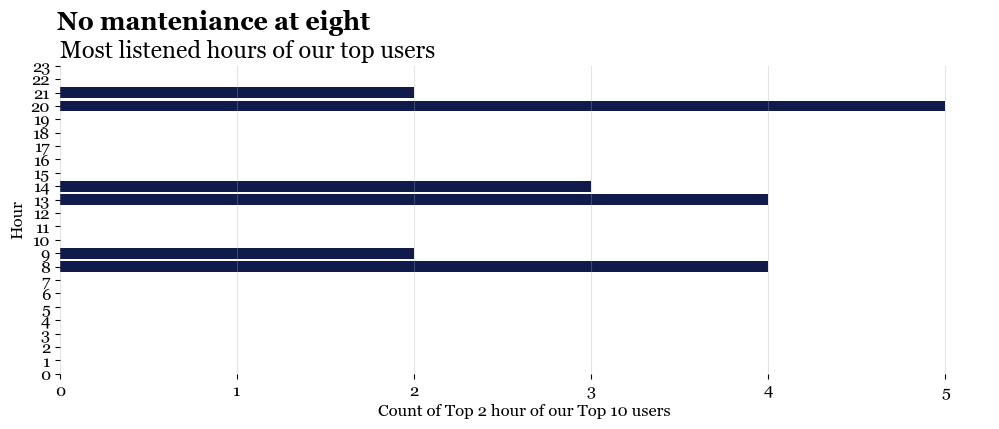

In [438]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('No manteniance at eight',
             ha='left', x=0.123, size=18,
             weight='bold', y=1.02)
plt.title('Most listened hours of our top users',
          size=17, loc='left')
plt.barh(df_top_hours['Hour'],
         width=df_top_hours['count'],
         color=juan_colors[0])
plt.xlabel('Count of Top 2 hour of our Top 10 users')
plt.ylabel('Hour')
plt.yticks(range(24))
plt.grid(True, color=juan_colors[2],
         axis='x', alpha=0.3)
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
plt.show()

We presented the list of favorite genres for every top user on our platform. Upon summarizing them, we found that Pop is the favorite genre among our top users, with 7 out of the top 10 users listing it as one of their top 5 genres. Acid is the favorite genre for 4 of the top 10 users, followed by New, Rock, PopEuroDance, NewAge, NewWave, Electronic, and Dance, each favored by 3 of the top 10 users.

Finally, we discovered that 8 p.m. is the hour when most of our top users are listening to their music. This could be a prime time for testing marketing campaigns or challenges with them. We need to ensure that we avoid scheduling updates or maintenance on our platform during this hour to retain their engagement.